# An example of using BluePyOpt/NeuronUnit Optimization
Using:
* Allen Brain Experimental data (`specimen_id=325479788`, sweep number `64`) to derive features from.
* EFEL feature extraction
* BluePyOpt Optimization.
* Numba JIT simple cell models (Izhikevich, Adaptive Exponential).
* Neuronunit model scoring

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="paper", font="monospace")
%matplotlib inline
SILENT = True
import warnings
if SILENT:
    warnings.filterwarnings("ignore")

from neuronunit.plotting.plot_utils import check_bin_vm_soma
from neuronunit.allenapi.allen_data_driven import opt_setup
from nb_utils import optimize_job
from sciunit.scores import RelativeDifferenceScore
import pandas as pd
import pickle
import quantities as pq
specimen_id = 325479788


test


In [2]:
def test_opt_relative_diff(specimen_id,model_type = "ADEXP",efel_filter_iterable=None):    
    _,scores,obs_preds,opt,target = optimize_job(specimen_id,
                                                 model_type,
                                                 score_type=RelativeDifferenceScore,
                                                 efel_filter_iterable=efel_filter_iterable)
    return obs_preds,opt,target


# Below is a plot of vm trace for fitting the simple model to with neuron unit.
* It is from Allen Specimen id `325479788`, sweep number `64`.
* sweep number 


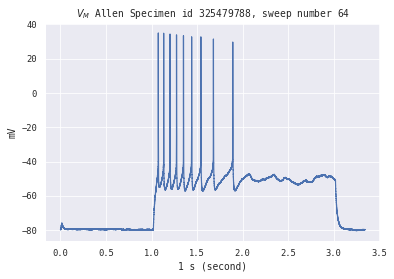

In [3]:
with open('325479788later_allen_NU_tests.p', "rb") as f:
    suite = pickle.load(f)
    
plt.plot(suite.traces["vm_soma"].times,suite.traces["vm_soma"])
plt.xlabel(pq.s)
plt.ylabel(suite.traces["vm_soma"].dimensionality)
plt.title("$V_{M}$ Allen Specimen id 325479788, sweep number 64")
plt.show()


# Example 1
* Izhikevich model 
* Allen specimen 325479788

In [4]:
efel_filter_iterable = [
    "Spikecount",
    "adaptation_index2",
    "peak_voltage",
    "AHP_depth_abs"
]
obs_preds,opt,target = test_opt_relative_diff(specimen_id = 325479788,model_type="IZHI",efel_filter_iterable=efel_filter_iterable)
#"voltage_after_stim"


gen	nevals	avg    	std   	min   	max  
1  	40    	3555.56	5385.9	5.6022	12000


2  	40    	2842.65	4999.43	2.91695	12000
3  	20    	43.2909	199.031	2.91695	1294.02
4  	20    	1006.64	3110.93	2.91695	12000  
5  	20    	883.495	3123.47	2.91695	12000  
6  	20    	1175.62	3559.03	2.91695	12000  
7  	20    	1467.67	3925.17	1.6939 	12000  
8  	20    	1182.75	3557.03	1.6939 	12000  
9  	20    	882.006	3123.89	1.6939 	12000  
10 	20    	1979.81	4375.39	1.6939 	12000  
11 	20    	1906.92	4231.41	1.6939 	12000  
12 	20    	2050.53	4514.5 	1.6939 	12000  
13 	20    	2343.48	4754.54	1.6939 	12000  
14 	20    	2051.53	4514.04	1.68607	12000  
15 	20    	2564.16	4849.01	1.68607	12000  
16 	20    	1466.51	3925.6 	1.68607	12000  
17 	20    	1758.45	4240.4 	1.66452	12000  
18 	20    	1978.99	4375.73	1.6469 	12000  
19 	20    	1687.1 	4087.11	1.6469 	12000  
20 	20    	2636.76	4965.61	1.6469 	12000  
21 	20    	589.227	2584.03	1.55346	12000  
22 	20    	2929.33	5151.8 	1.55346	12000  
23 	20    	3221.58	5315.6 	1.55346	12000  
24 	20    	2343.75	4754.41	1.55346	12000  
25 	20    	23

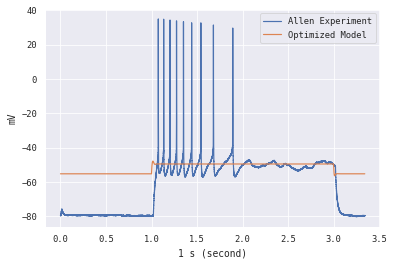

In [5]:

check_bin_vm_soma(target,opt)

In [6]:
opt.attrs_to_params()
params = pd.DataFrame([opt.params])
params

,C,k,vr,vt,vPeak,a,b,c,d,celltype
0,76.68,0.67,-55.33,-41.46,34.85,0.15,10.7,-59.0,33.69,3


In [7]:
df = pd.DataFrame(obs_preds)
df.rename(columns={0:'EFEL_feature_NU_test_Name',1:'prediction',2:'observation',3:'neuronunit_score'},inplace=True)
df

,EFEL_feature_NU_test_Name,prediction,observation,neuronunit_score
0,Spikecount,9.000000,9.000000,Relative Difference = 0.00
1,adaptation_index2,0.091943,-0.002071,Relative Difference = 0.09
2,peak_voltage,33.027779,33.824911,Relative Difference = 0.80
3,spike_0,1.074385,1.039500,Relative Difference = 0.03
4,spike_1,1.133280,1.151000,Relative Difference = 0.02
5,spike_2,1.203080,1.260750,Relative Difference = 0.06
6,spike_3,1.274420,1.387250,Relative Difference = 0.11
7,spike_4,1.350750,1.495250,Relative Difference = 0.14
8,spike_5,1.440345,1.614500,Relative Difference = 0.17
9,spike_6,1.541740,1.723500,Relative Difference = 0.18


# Example 2
* Now fit Adaptive Exponential model to a single sweep from Allen specimen 325479788 sweep number 64

In [ ]:
efel_filter_iterable = [
    "ISI_log_slope",
    "mean_frequency",
    "adaptation_index2",
    "ISI_CV",
    "median_isi",
    "Spikecount",
    "all_ISI_values",
    "ISI_values"
    "peak_voltage",
    "AHP_depth",
    "AHP_depth_abs",
    "base_voltage",
    ]
obs_preds,opt,target = test_opt_relative_diff(specimen_id = 325479788,efel_filter_iterable=efel_filter_iterable)


gen	nevals	avg    	std    	min    	max  
1  	100   	3969.03	6173.34	8.57557	17000


2  	100   	4145.58	6176.58	6.79438	17000
3  	50    	516.575	2013.29	5.32646	12044.7
4  	50    	156.683	1214.96	4.78838	12044.6
5  	50    	448.59 	2516.91	4.78838	17000  
6  	50    	249.697	1676.61	4.78838	12044.5
7  	50    	127.915	1191.62	4.3239 	12044.1
8  	50    	127.469	1191.77	4.24463	12045.2
9  	50    	127.154	1191.69	4.24463	12044  
10 	50    	126.718	1191.84	3.56076	12045.1
11 	50    	7.14851	2.51587	2.43802	14.3814
12 	50    	6.64412	2.47833	2.43802	13.4712
13 	50    	7.3018 	2.35433	2.43802	13.6973
14 	50    	6.21944	2.20469	2.43802	14.5782
15 	50    	5.94901	2.33838	2.43802	13.4784
16 	50    	5.59885	1.94806	2.43802	10.6839
17 	50    	5.41441	1.84822	2.43802	14.0301
18 	50    	5.24899	1.9269 	2.37245	11.8537
19 	50    	5.08658	1.63379	2.37245	10.0166
20 	50    	4.43682	1.59965	2.37245	10.6719
21 	50    	4.18383	1.38329	2.3386 	8.68028
22 	50    	3.99527	1.28423	2.08264	7.57651
23 	50    	4.05671	1.33159	2.05432	8.67408
24 	50    	4.07679	1.19798	1.50144	7.20299
25 	50    	4.

In [ ]:
df = pd.DataFrame(obs_preds)
df.rename(columns={0:'EFEL_feature_NU_test_Name',1:'prediction',2:'observation',3:'neuronunit_score'},inplace=True)
df

In [ ]:
check_bin_vm_soma(target,opt)


In [ ]:
opt.attrs_to_params()
params = pd.DataFrame([opt.params])
params
